<a href="https://colab.research.google.com/github/TassyaRM/MachineLearning_TK-44-G4_/blob/main/Mgg13/CNN_Modern_Tassya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AlexNet  Praktik**

![AlexNet Architecture](https://raw.githubusercontent.com/blurred-machine/Data-Science/master/Deep%20Learning%20SOTA/img/alexnet2.png)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

Kode tersebut merupakan skrip Python yang mengimpor beberapa modul dari perpustakaan PyTorch dan torchvision. Berikut adalah penjelasan setiap barisnya:

1. **Impor PyTorch dan modul-modulnya:**
   - `torch`: Ini adalah perpustakaan inti PyTorch yang menyediakan tensor multi-dimensi dan operasi matematika pada mereka.
   - `torch.nn`: Modul ini berisi kelas-kelas yang berkaitan dengan jaringan saraf, termasuk berbagai lapisan dan kelas dasar `Module` untuk membuat arsitektur jaringan saraf kustom.
   - `torch.optim`: Modul ini berisi algoritma optimisasi, seperti Adam, SGD, dll.

2. **Impor torchvision dan modul-modulnya:**
   - `torchvision`: Ini adalah perpustakaan terpisah yang dibangun di atas PyTorch, dirancang khusus untuk tugas visi komputer. Ini mencakup kumpulan data, model, dan transformasi untuk tugas visi umum.
   - `torchvision.transforms`: Modul ini berisi berbagai transformasi gambar yang dapat diterapkan pada kumpulan data, seperti merubah ukuran, pemotongan, dan normalisasi.

3. **Impor DataLoader:**
   - `torch.utils.data`: Modul ini menyediakan alat-alat untuk bekerja dengan data, termasuk kelas `DataLoader`. `DataLoader` digunakan untuk memuat dan mengiterasi batch data secara efisien selama pelatihan atau evaluasi.


In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Baris kode di atas mengatur perangkat (device) untuk digunakan dalam komputasi. Jika GPU tersedia, perangkat diatur ke "cuda" (GPU); jika tidak, diatur ke "cpu" (CPU).

In [ ]:
# Define the AlexNet architecture for MNIST
class AlexNetMNIST(nn.Module):
    def __init__(self):
        super(AlexNetMNIST, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, 10),  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Kode diatas mendefinisikan arsitektur jaringan saraf untuk dataset MNIST menggunakan PyTorch, khususnya mengimplementasikan arsitektur AlexNet yang awalnya dirancang untuk tugas klasifikasi gambar. Berikut adalah penjelasan singkat:

1. **Definisi Kelas:**
   - Mendefinisikan kelas baru bernama `AlexNetMNIST` yang mewarisi dari `nn.Module`. Ini berarti bahwa `AlexNetMNIST` adalah modul jaringan saraf PyTorch.

2. **Metode Konstruktor (`__init__`):**
   - Metode `__init__` menginisialisasi jaringan saraf. Metode ini memanggil konstruktor dari kelas induk (`nn.Module`) menggunakan `super()`.

3. **Arsitektur Jaringan:**
   - `self.features`: Mendefinisikan bagian ekstraksi fitur jaringan menggunakan rangkaian lapisan konvolusi dan pooling. Arsitektur mengikuti pola dari AlexNet asli.
   - `self.avgpool`: Menerapkan pooling rata-rata yang adaptif untuk mengubah keluaran menjadi ukuran tetap (6x6).
   - `self.classifier`: Mendefinisikan lapisan sepenuhnya terhubung untuk klasifikasi, termasuk lapisan dropout.

4. **Metode `forward`:**
   - Metode `forward` mendefinisikan langkah maju (forward pass) dari jaringan. Metode ini menentukan bagaimana input `x` harus diproses melalui lapisan yang didefinisikan dalam metode `__init__`.

5. **Nilai Kembalian:**
   - Output dari metode `forward` adalah hasil klasifikasi, dan nilai tersebut dikembalikan.

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

Kode diatas bertujuan untuk memuat dataset MNIST (dataset digit tulisan tangan) menggunakan PyTorch's torchvision. Di bawah ini adalah penjelasan singkat untuk setiap barisnya:

1. **`transforms.Compose([...])`:**
   - `transforms.Compose` digunakan untuk menggabungkan beberapa transformasi data menjadi satu.
   - Dalam hal ini, ada dua transformasi yang digabungkan.
   
2. **`transforms.Resize((224, 224))`:**
   - Transformasi ini mengubah ukuran gambar menjadi (224, 224). AlexNet yang akan digunakan kemudian memerlukan gambar input dengan ukuran ini.

3. **`transforms.ToTensor()`:**
   - Transformasi ini mengonversi gambar menjadi tensor PyTorch. Secara khusus, mengubah format gambar dari PIL (Python Imaging Library) ke tensor.

4. **`transform`:**
   - Variabel `transform` menyimpan gabungan dari dua transformasi di atas.

Define train dataset dan tes dataset

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Initialize model, loss function, and optimizer
model = AlexNetMNIST().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Kode diatas berfokus pada inisialisasi model, fungsi kerugian (loss function), dan pengoptimal (optimizer) untuk melatih jaringan saraf. Berikut Penjelasan setiap barisnya:

1. **`model = AlexNetMNIST().to(device)`:**
   - Inisialisasi model neural network dengan membuat objek dari kelas `AlexNetMNIST`.
   - `AlexNetMNIST()` merupakan panggilan konstruktor untuk membuat instance dari model yang telah didefinisikan sebelumnya.
   - `.to(device)` digunakan untuk memindahkan model ke perangkat yang telah ditentukan sebelumnya (GPU jika tersedia, jika tidak, maka ke CPU).

2. **`criterion = nn.CrossEntropyLoss()`:**
   - Inisialisasi fungsi kerugian. Dalam hal ini, digunakan fungsi Cross Entropy Loss, yang umumnya digunakan dalam tugas klasifikasi multikelas.
   - `nn.CrossEntropyLoss()` adalah panggilan konstruktor untuk membuat instance dari fungsi tersebut.

3. **`optimizer = optim.Adam(model.parameters(), lr=0.001)`:**
   - Inisialisasi pengoptimal. Adam adalah salah satu algoritma pengoptimalan yang efektif.
   - `model.parameters()` memberikan parameter-parameter yang dapat diatur (diubah) dalam model.
   - `lr=0.001` adalah laju pembelajaran (learning rate) yang digunakan oleh pengoptimal. Laju pembelajaran mengontrol seberapa besar langkah yang diambil dalam arah yang mengoptimalkan model.
   - `optim.Adam(...)` adalah panggilan konstruktor untuk membuat instance dari pengoptimal Adam dengan konfigurasi tertentu.

In [ ]:
# Training
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.3184766707709059
Epoch 2/5, Loss: 0.08082596762501734
Epoch 3/5, Loss: 0.0665785755178626
Epoch 4/5, Loss: 0.05703342898428859
Epoch 5/5, Loss: 0.05042918554124875


Kode diatas menjelaskan proses pelatihan (training) untuk model jaringan saraf. Berikut adalah penjelasan setiap bagian dari kode tersebut:

1. **`num_epochs = 5`:**
   - Jumlah epoch atau iterasi penuh melalui seluruh dataset pelatihan. Satu epoch terjadi ketika model melihat dan melatih pada setiap sampel data dalam dataset pelatihan satu kali.

2. **`for epoch in range(num_epochs):`:**
   - Loop pertama: Iterasi melalui setiap epoch.

3. **`model.train()`:**
   - Mengatur model ke mode pelatihan. Ini penting karena beberapa lapisan, seperti dropout, berperilaku berbeda antara mode pelatihan dan evaluasi. Dengan mengatur model ke mode pelatihan, dropout akan aktif selama pelatihan.

4. **`total_loss = 0.0`:**
   - Menginisialisasi variabel `total_loss` untuk menyimpan total kerugian (loss) selama satu epoch.

5. **`for inputs, labels in train_loader:`:**
   - Loop kedua: Iterasi melalui setiap batch dari `train_loader`. `train_loader` adalah iterator yang menyediakan batch dari dataset pelatihan pada setiap iterasi.

6. **`inputs, labels = inputs.to(device), labels.to(device)`:**
   - Memindahkan data ke perangkat yang ditentukan (`device`), misalnya, GPU atau CPU.

7. **`optimizer.zero_grad()`:**
   - Mengatur gradien parameter model menjadi nol. Ini diperlukan sebelum menghitung gradien dalam langkah selanjutnya.

8. **`outputs = model(inputs)`:**
   - Melakukan forward pass (langkah maju) untuk menghasilkan prediksi model.

9. **`loss = criterion(outputs, labels)`:**
   - Menghitung kerugian (loss) antara prediksi model dan label yang sebenarnya menggunakan fungsi kerugian yang telah diinisialisasi sebelumnya.

10. **`loss.backward()`:**
   - Melakukan backward pass (langkah mundur) untuk menghitung gradien dari parameter model terhadap fungsi kerugian.

11. **`optimizer.step()`:**
   - Memperbarui parameter model menggunakan pengoptimal dengan melakukan langkah pengoptimalan (optimization step).

12. **`total_loss += loss.item()`:**
   - Menambahkan loss dari batch saat ini ke total_loss untuk menghitung rata-rata loss selama satu epoch.

13. **`print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")`:**
   - Mencetak rata-rata loss selama satu epoch.

In [ ]:
# Testing
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9895


Kode diatas menjelaskan proses pengujian (testing) model pada dataset uji. Berikut adalah penjelasan setiap bagian dari kode tersebut:

1. **`model.eval()`:**
   - Mengatur model ke mode evaluasi. Ini penting karena beberapa lapisan, seperti dropout, berperilaku berbeda antara mode pelatihan dan evaluasi. Dengan mengatur model ke mode evaluasi, dropout dinonaktifkan sehingga hasil prediksi lebih konsisten.

2. **`total_correct = 0` dan `total_samples = 0`:**
   - Menginisialisasi variabel untuk menyimpan total prediksi yang benar dan total sampel dalam dataset uji.

3. **`with torch.no_grad():`:**
   - Menggunakan blok `torch.no_grad()` untuk menonaktifkan perhitungan gradien selama pengujian. Hal ini membantu menghemat memori dan mempercepat proses karena gradien tidak perlu disimpan.

4. **`for inputs, labels in test_loader:`:**
   - Iterasi melalui setiap batch dari `test_loader`, yang menyediakan batch dari dataset uji pada setiap iterasi.

5. **`inputs, labels = inputs.to(device), labels.to(device)`:**
   - Memindahkan data ke perangkat yang ditentukan (`device`), misalnya, GPU atau CPU.

6. **`outputs = model(inputs)`:**
   - Melakukan forward pass (langkah maju) untuk menghasilkan prediksi model pada data uji.

7. **`_, predictions = torch.max(outputs, 1)`:**
   - Mengambil kelas prediksi dengan nilai tertinggi dari setiap baris keluaran menggunakan fungsi `torch.max`.

8. **`total_correct += (predictions == labels).sum().item()`:**
   - Menambahkan jumlah prediksi yang benar pada batch saat ini ke total prediksi yang benar.

9. **`total_samples += labels.size(0)`:**
   - Menambahkan jumlah sampel dalam batch saat ini ke total sampel.

10. **`accuracy = total_correct / total_samples`:**
    - Menghitung akurasi total dengan membagi total prediksi yang benar dengan total sampel.

11. **`print(f"Test Accuracy: {accuracy}")`:**
    - Mencetak akurasi uji hasil pengujian model pada dataset uji.

Correctly Classified Images:


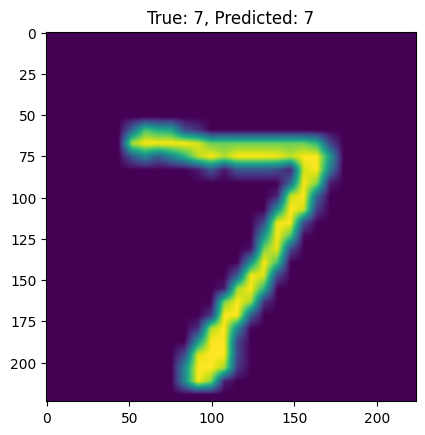

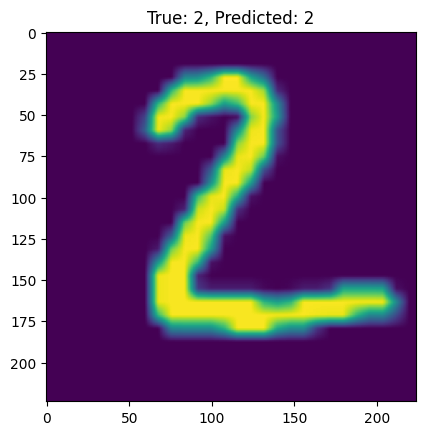

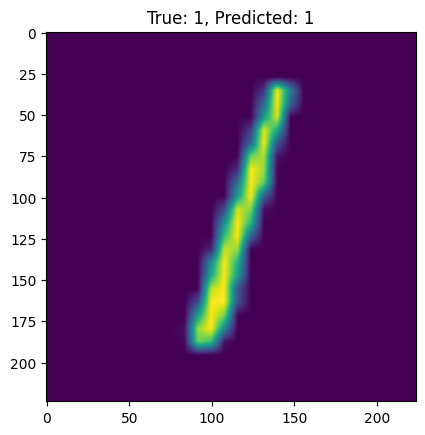

Incorrectly Classified Images:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display images with labels
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = dataiter.__next__()  # Use __next__() instead of next()
images, labels = images.to(device), labels.to(device)

# Make predictions
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Display correct predictions
print("Correctly Classified Images:")
for i in range(min(3, len(correct_pred_indices))):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Display incorrect predictions
print("Incorrectly Classified Images:")
for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

Kode diatas bertujuan untuk menampilkan beberapa contoh gambar dari dataset uji beserta prediksi model, khususnya menampilkan gambar yang diklasifikasikan dengan benar dan yang diklasifikasikan dengan salah. Berikut adalah penjelasan setiap bagian dari kode tersebut:

1. **`imshow` Function:**
   - Fungsi ini digunakan untuk menampilkan gambar bersama dengan labelnya.
   - `img` adalah gambar dalam format tensor PyTorch.
   - `np.transpose(npimg, (1, 2, 0))` digunakan untuk mengubah dimensi gambar dari (C, H, W) menjadi (H, W, C), yang diperlukan oleh Matplotlib.
   - `plt.imshow` menampilkan gambar.
   - `plt.title` menambahkan judul pada gambar.
   - `plt.show()` menampilkan gambar secara aktual.

2. **Get a Batch of Test Data:**
   - `iter(test_loader)` membuat iterator dari `test_loader`.
   - `dataiter.__next__()` mengambil satu batch data uji.
   - `images, labels = images.to(device), labels.to(device)` memindahkan data ke perangkat yang ditentukan (`device`).

3. **Make Predictions:**
   - Mengatur model ke mode evaluasi menggunakan `model.eval()`. Ini penting untuk memastikan bahwa lapisan seperti dropout beroperasi dengan benar selama evaluasi.
   - Dengan `torch.no_grad()`, kita memastikan bahwa perhitungan gradien dimatikan selama pengujian untuk menghemat memori.
   - `outputs = model(images)` menghasilkan prediksi model.
   - `_, predicted = torch.max(outputs, 1)` mengambil kelas prediksi dengan nilai tertinggi dari setiap baris keluaran.

4. **Display Images with Predictions:**
   - Mengidentifikasi indeks dari prediksi yang benar dan yang salah.

5. **Display Correct Predictions:**
   - Mencetak judul dan menampilkan tiga contoh gambar yang diklasifikasikan dengan benar.

6. **Display Incorrect Predictions:**
   - Mencetak judul dan menampilkan tiga contoh gambar yang diklasifikasikan dengan salah.

#**LeNet 5  Praktik**

![LeNet 5 Architecture](https://www.datasciencecentral.com/wp-content/uploads/2021/10/1lvvWF48t7cyRWqct13eU0w.jpeg)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the LeNet-5 architecture for MNIST
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)  # Ganti padding menjadi 0
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Hitung jumlah fitur yang dihasilkan oleh lapisan konvolusi dan pooling sebelumnya
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.relu3 = nn.ReLU()

        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()

        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x)
        return x

Berikut adalah penjelasan per baris dari kode LeNet-5 diatas:

1. **`class LeNet5(nn.Module):`**
   - Mendefinisikan sebuah kelas `LeNet5` yang merupakan turunan dari kelas `nn.Module` dalam PyTorch, yang berarti kita membuat model neural network.

2. **`def __init__(self):`**
   - Inisialisasi objek `LeNet5` saat dibuat.
   - Memanggil konstruktor kelas induk (`nn.Module`) menggunakan `super()`.

3. **`self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0)`**
   - Membuat layer konvolusi pertama (`conv1`).
   - Input: 1 channel (grayscale), Output: 6 channel.
   - Kernel size: 5x5, Stride: 1, Padding: 0.
  
4. **`self.relu1 = nn.ReLU()`**
   - Membuat layer aktivasi ReLU pertama (`relu1`).

5. **`self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)`**
   - Membuat layer max pooling pertama (`pool1`).
   - Kernel size: 2x2, Stride: 2.

6. **`self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)`**
   - Membuat layer konvolusi kedua (`conv2`).
   - Input: 6 channel, Output: 16 channel.
   - Kernel size: 5x5, Stride: 1 (default), Padding: 0.

7. **`self.relu2 = nn.ReLU()`**
   - Membuat layer aktivasi ReLU kedua (`relu2`).

8. **`self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)`**
   - Membuat layer max pooling kedua (`pool2`).
   - Kernel size: 2x2, Stride: 2.

9. **`self.fc1 = nn.Linear(16 * 5 * 5, 120)`**
   - Membuat layer fully connected pertama (`fc1`).
   - Input: Hasil flatten dari output konvolusi sebelumnya.
   - Output: 120 units.

10. **`self.relu3 = nn.ReLU()`**
    - Membuat layer aktivasi ReLU ketiga (`relu3`).

11. **`self.fc2 = nn.Linear(120, 84)`**
    - Membuat layer fully connected kedua (`fc2`).
    - Input: 120 units, Output: 84 units.

12. **`self.relu4 = nn.ReLU()`**
    - Membuat layer aktivasi ReLU keempat (`relu4`).

13. **`self.fc3 = nn.Linear(84, 10)`**
    - Membuat layer fully connected ketiga (`fc3`).
    - Input: 84 units, Output: 10 units (sesuai jumlah kelas di MNIST).

14. **`def forward(self, x):`**
    - Mendefinisikan metode `forward`, yang menentukan aliran data dari input ke output.

15. **`x = self.pool1(self.relu1(self.conv1(x)))`**
    - Aliran data melalui konvolusi pertama, aktivasi ReLU pertama, dan max pooling pertama.

16. **`x = self.pool2(self.relu2(self.conv2(x)))`**
    - Aliran data melalui konvolusi kedua, aktivasi ReLU kedua, dan max pooling kedua.

17. **`x = x.view(-1, 16 * 5 * 5)`**
    - Mengubah dimensi tensor agar dapat di-feed ke layer fully connected pertama.

18. **`x = self.relu3(self.fc1(x))`**
    - Aliran data melalui fully connected pertama dan aktivasi ReLU ketiga.

19. **`x = self.relu4(self.fc2(x))`**
    - Aliran data melalui fully connected kedua dan aktivasi ReLU keempat.

20. **`x = self.fc3(x)`**
    - Aliran data melalui fully connected ketiga (output layer).

21. **`return x`**
    - Mengembalikan hasil akhir dari model.

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Initialize model, loss function, and optimizer
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.28677383391186595
Epoch 2/5, Loss: 0.08073139316571165
Epoch 3/5, Loss: 0.057551008557328885
Epoch 4/5, Loss: 0.04576856353983426
Epoch 5/5, Loss: 0.035865942620350096


Berikut adalah penjelasan dari kode training diatas:

1. **`num_epochs = 5`**
   - Jumlah iterasi (epoch) yang akan dilakukan selama proses training. Dalam kasus ini, model akan melalui seluruh dataset pelatihan sebanyak 5 kali.

2. **`for epoch in range(num_epochs):`**
   - Iterasi melalui setiap epoch (siklus lengkap melalui seluruh dataset pelatihan).

3. **`model.train()`**
   - Mengatur model ke mode pelatihan. Hal ini penting karena beberapa lapisan seperti dropout dan batch normalization berperilaku berbeda antara mode pelatihan dan evaluasi.

4. **`total_loss = 0.0`**
   - Inisialisasi variabel `total_loss` yang akan digunakan untuk menghitung total loss pada setiap epoch.

5. **`for inputs, labels in train_loader:`**
   - Iterasi melalui setiap batch dalam `train_loader`, yang memuat batch data pelatihan bersama dengan labelnya.

6. **`inputs, labels = inputs.to(device), labels.to(device)`**
   - Memindahkan data masukan dan label ke perangkat yang aktif (GPU jika tersedia).

7. **`optimizer.zero_grad()`**
   - Mengatur gradient semua parameter model menjadi 0.0. Ini perlu dilakukan sebelum setiap iterasi training untuk menghindari akumulasi gradient dari iterasi sebelumnya.

8. **`outputs = model(inputs)`**
   - Menghitung output model untuk batch saat ini.

9. **`loss = criterion(outputs, labels)`**
   - Menghitung loss antara output model dan label sebenarnya menggunakan fungsi loss yang telah ditentukan sebelumnya (dalam hal ini, menggunakan CrossEntropyLoss).

10. **`loss.backward()`**
    - Menghitung gradient loss terhadap parameter model menggunakan backpropagation.

11. **`optimizer.step()`**
    - Mengupdate parameter model berdasarkan gradient yang dihitung sebelumnya menggunakan optimizer yang telah ditentukan (dalam hal ini, menggunakan Adam optimizer).

12. **`total_loss += loss.item()`**
    - Menambahkan loss dari batch saat ini ke total loss untuk epoch ini.

13. **`print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")`**
    - Mencetak nilai rata-rata loss untuk epoch saat ini. Ini memberikan indikasi seberapa baik model sedang belajar dari data pelatihan. Semakin rendah nilai loss, semakin baik modelnya belajar.

In [ ]:
# Testing
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9894


Berikut adalah penjelasan per baris dari kode evaluasi (testing) diatas:

1. **`model.eval()`**
   - Mengatur model ke mode evaluasi. Mode ini mengaktifkan pengaruh lapisan-lapisan seperti dropout dan batch normalization agar tidak berlaku saat evaluasi.

2. **`total_correct = 0`**
   - Inisialisasi variabel `total_correct` yang akan digunakan untuk menghitung total prediksi yang benar.

3. **`total_samples = 0`**
   - Inisialisasi variabel `total_samples` yang akan digunakan untuk menghitung total sampel (jumlah data uji).

4. **`with torch.no_grad():`**
   - Memulai blok operasi tanpa perhitungan gradien. Ini meningkatkan efisiensi dan menghindari penggunaan memori yang tidak perlu saat melakukan evaluasi.

5. **`for inputs, labels in test_loader:`**
   - Iterasi melalui setiap batch dalam `test_loader`, yang memuat batch data uji bersama dengan labelnya.

6. **`inputs, labels = inputs.to(device), labels.to(device)`**
   - Memindahkan data masukan dan label ke perangkat yang aktif (GPU jika tersedia).

7. **`outputs = model(inputs)`**
   - Menghitung output model untuk batch saat ini.

8. **`_, predictions = torch.max(outputs, 1)`**
   - Mengambil indeks kelas dengan probabilitas tertinggi sebagai prediksi model. `_` digunakan untuk menangkap nilai yang tidak digunakan.

9. **`total_correct += (predictions == labels).sum().item()`**
   - Menambahkan jumlah prediksi yang benar pada batch saat ini ke total prediksi yang benar.

10. **`total_samples += labels.size(0)`**
    - Menambahkan jumlah sampel pada batch saat ini ke total sampel.

11. **`accuracy = total_correct / total_samples`**
    - Menghitung akurasi total dengan membagi total prediksi yang benar dengan total sampel.

12. **`print(f"Test Accuracy: {accuracy}")`**
    - Mencetak akurasi pengujian keseluruhan pada dataset uji setelah selesai menguji seluruh batch.

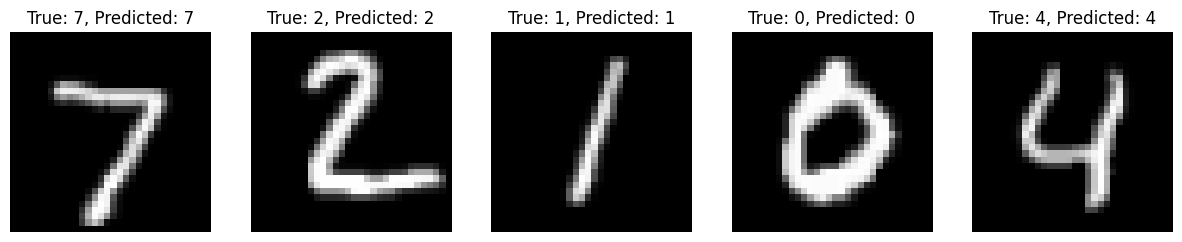

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set model ke mode evaluasi
model.eval()

# Mendapatkan satu batch data uji
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Membuat prediksi dengan model
with torch.no_grad():
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)

# Menampilkan beberapa gambar dengan label dan prediksi
num_images_to_display = 5
fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    # Menampilkan gambar
    image = images[i].cpu().numpy().squeeze()
    axes[i].imshow(image, cmap='gray')

    # Menampilkan label sebenarnya dan prediksi
    true_label = labels[i].item()
    predicted_label = predictions[i].item()
    title = f'True: {true_label}, Predicted: {predicted_label}'
    axes[i].set_title(title)
    axes[i].axis('off')

plt.show()

#**VGGNet Praktik**

![VGGNet](https://www.researchgate.net/profile/Zhuofa-Chen/publication/351476658/figure/fig1/AS:1022122327556098@1620704361699/GGNet-architecture-A-face-expression-image-is-fed-into-the-model-The-four-convolutional.png)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# Set device to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Define the VGGNet architecture for MNIST
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(256 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [ ]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
# Initialize model, loss function, and optimizer
model = VGGNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.26109093021817886
Epoch 2/5, Loss: 0.07593774339278489
Epoch 3/5, Loss: 0.0602211915731017
Epoch 4/5, Loss: 0.05352456929130931
Epoch 5/5, Loss: 0.04689940115621091


In [ ]:
# Testing
model.eval()
total_correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predictions = torch.max(outputs, 1)

        total_correct += (predictions == labels).sum().item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9887


Correctly Classified Images:


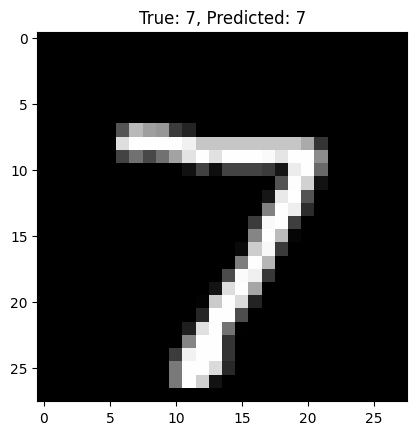

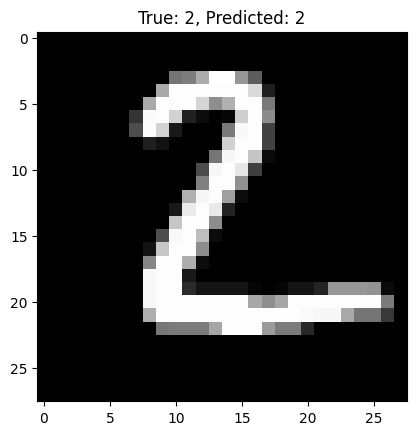

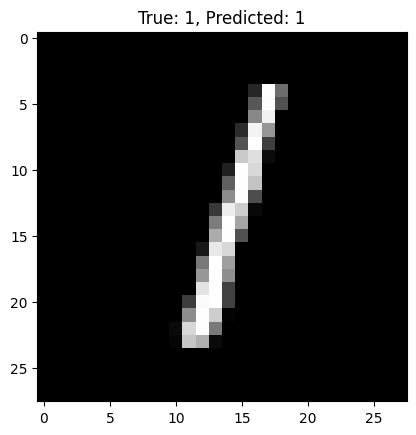

Incorrectly Classified Images:


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set the model to evaluation mode
model.eval()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images)
_, predictions = torch.max(outputs, 1)

# Display images with predictions
correct_pred_indices = (predictions == labels).nonzero().squeeze()
incorrect_pred_indices = (predictions != labels).nonzero().squeeze()

# Display correct predictions
print("Correctly Classified Images:")
for i in range(min(3, len(correct_pred_indices))):
    index = correct_pred_indices[i]
    img = images[index].cpu().numpy().squeeze()
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {labels[index].item()}, Predicted: {predictions[index].item()}")
    plt.show()

# Display incorrect predictions
print("Incorrectly Classified Images:")
for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i]
    img = images[index].cpu().numpy().squeeze()
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {labels[index].item()}, Predicted: {predictions[index].item()}")
    plt.show()